In [33]:
import numpy as np
import scipy as sp
import ot 
import networkx as nx
import sys
import seaborn as sns
import matplotlib.pyplot as plt
from constants import ROOT_DIR

# setting the path of this notebook to the root directory
sys.path.append(ROOT_DIR)
# import libraries custom in this repository
import methods.DataIO as DataIO
import methods.GromovWassersteinFramework as GWL
import dev.generate_util as Gen

sns.set()
%matplotlib inline

In [34]:
cycle_g = nx.Graph(Gen.gen_cycle_graph(5))

p_s, cost_s, _ = DataIO.extract_graph_info(cycle_g)
p_s /= np.sum(p_s)
cost_s = cost_s + cost_s.T
cost_s = cost_s.toarray()

In [23]:
def gw_trans_wrapper(epsilon): 
    gw_dist, log = ot.gromov.entropic_gromov_wasserstein2(cost_s, cost_s, list(p_s.flatten()), list(p_s.flatten()), 
                    "square_loss", epsilon=epsilon, log = True)
    print(f"Epsilon: {epsilon}")
    print(f"GW Distance: {gw_dist}")
    plt.imshow(log["T"])
    plt.colorbar()

Epsilon: 0.01
GW Distance: 0.48000000000000004


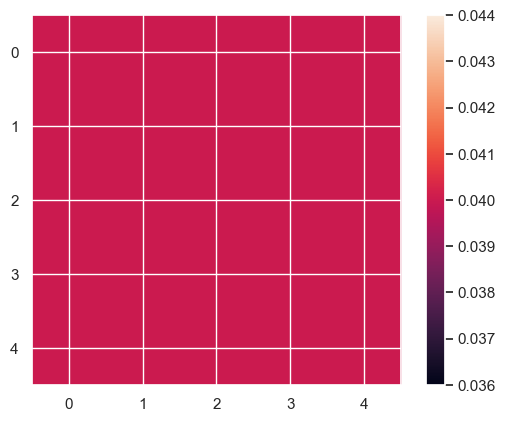

In [24]:
gw_trans_wrapper(1e-2)

Epsilon: 0.0015
GW Distance: 0.48000000000000004


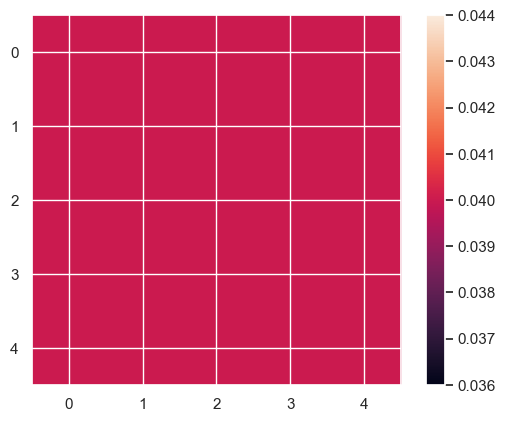

In [30]:
gw_trans_wrapper(0.0015)

Epsilon: 0.00115
GW Distance: 0.0


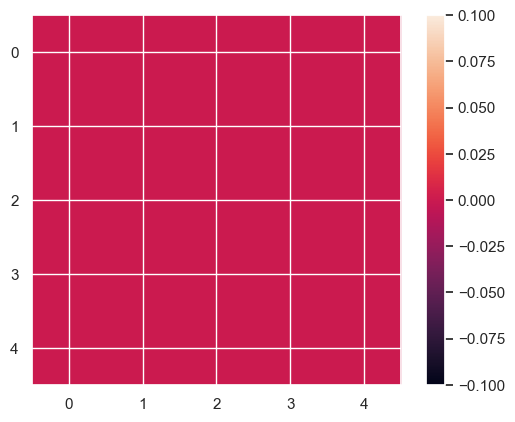

In [31]:
gw_trans_wrapper(0.00115)

In [43]:
trans = ot.gromov.entropic_gromov_wasserstein(cost_s, cost_s, list(p_s.flatten()), list(p_s.flatten()), 
                    "square_loss", epsilon=0.01, log=True)

In [44]:
trans

(array([[0.04, 0.04, 0.04, 0.04, 0.04],
        [0.04, 0.04, 0.04, 0.04, 0.04],
        [0.04, 0.04, 0.04, 0.04, 0.04],
        [0.04, 0.04, 0.04, 0.04, 0.04],
        [0.04, 0.04, 0.04, 0.04, 0.04]]),
 {'err': [3.469446951953614e-17], 'gw_dist': 0.48000000000000004})

In [52]:
def gw_trans_wrapper2(epsilon): 
    trans, info = ot.gromov.entropic_gromov_wasserstein(cost_s, cost_s, list(p_s.flatten()), list(p_s.flatten()), 
                    "square_loss", epsilon=epsilon, log=True)
    print(f"Epsilon: {epsilon}")
    print("GW Dist:", info['gw_dist'])
    plt.imshow(trans)
    plt.colorbar()

Epsilon: 0.01
GW Dist: 0.48000000000000004


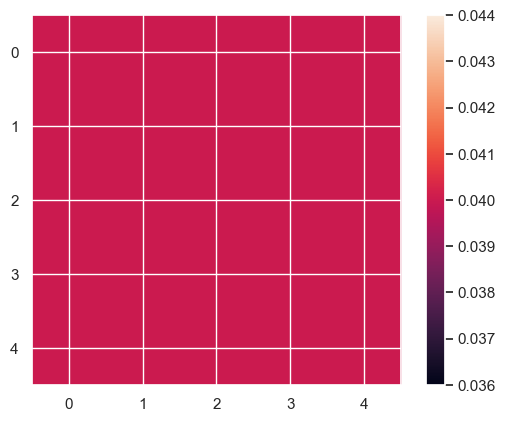

In [53]:
gw_trans_wrapper2(1e-2)

Epsilon: 0.005
GW Dist: 0.48000000000000004


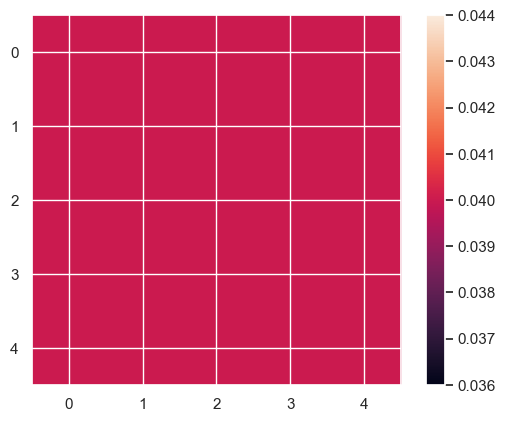

In [66]:
gw_trans_wrapper2(0.005)